In [246]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [247]:
import warnings
import matplotlib.cm  as cm
from sklearn import decomposition
from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
import csv
import pandas as pd

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

In [248]:
dataset = pd.read_csv('user_features.csv')

X = dataset.loc[:,['joy_ave',
                   'joy_max',
                   'anger_ave',
                   'anger_max',
                   'sad_ave',
                   'sad_max',
                   'fear_ave',
                   'fear_max',
                   'score',
                   'words',
                   'posts']]

In [249]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print ujd, wjd
        H = 0

    return H

In [250]:
wcss = []

for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

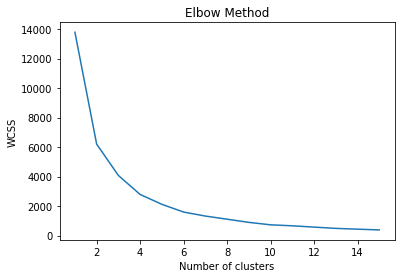

In [251]:
plot.plot(range(1,16), wcss) 
plot.title('Elbow Method') 
plot.xlabel('Number of clusters') 
plot.ylabel('WCSS') 
plot.show()

In [252]:
#KMeans CLustering

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)

y = kmeans.fit_predict(X)

In [253]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [268]:
#Hopkins Value
print(hopkins(X))

0.901206406754


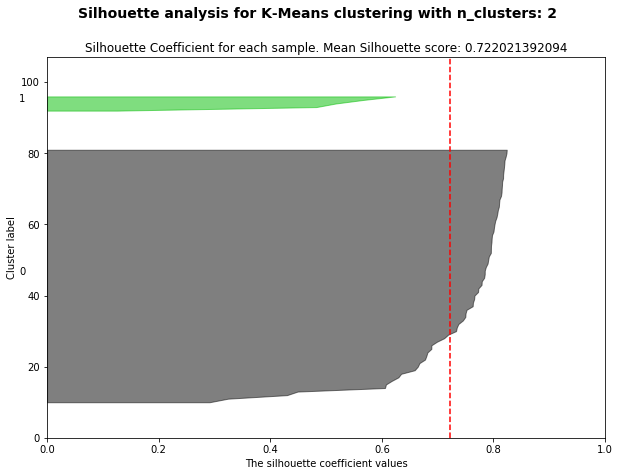

In [271]:
# List of number of clusters
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    
    # Perform k-means.
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
    y_pred = kmeans.fit_predict(X)
    
    # Compute the Silhouette Coefficient for each sample.
    s = metrics.silhouette_samples(X, y_pred)
    
    # Compute the mean Silhouette Coefficient of all data points.
    s_mean = metrics.silhouette_score(X, y_pred,metric='euclidean')
    
    # For plot configuration
    fig, (ax1) = plot.subplots(1)
    fig.set_size_inches(10, 7)
    
    # Configure plot.
    plot.suptitle('Silhouette analysis for K-Means clustering with n_clusters: {}'.format(n_clusters), 
                  fontsize=14, fontweight='bold')
    
    # Configure 1st subplot.
    ax1.set_title('Silhouette Coefficient for each sample. Mean Silhouette score: {}'.format(s_mean))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Plot Silhouette Coefficient for each sample
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_s,
                          facecolor = color,
                          edgecolor = color, 
                          alpha = 0.5)
        ax1.text(-0.05, 
                 y_lower + 0.5 * size_cluster_i, 
                 str(i))
        y_lower = y_upper + 10
        
    # Plot the mean Silhouette Coefficient using red vertical dash line.
    ax1.axvline(x=s_mean, color = "red", linestyle = "--")
    
    # Plot the predictions
    colors = cm.spectral(y_pred.astype(float) / n_clusters)